Selecting variants by input library count
-------------------------------------------------------------

This notebook gets scores and standard errors for the variants in a Selection that exceed a minimum count cutoff in the input time point, and plots the relationship between each variant's score and input count.

In [1]:
% matplotlib inline

In [2]:
from __future__ import print_function
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from enrich2.variant import WILD_TYPE_VARIANT
import enrich2.plots as enrich_plot
pd.set_option("display.max_rows", 10) # rows shown when pretty-printing

Modify the ``results_path`` variable in the next cell to match the output directory of your Enrich2-Example dataset.

In [3]:
results_path = "/path/to/Enrich2-Example/Results/"

Open the Selection HDF5 file with the variants we are interested in.

In [5]:
my_store = pd.HDFStore(os.path.join(results_path, "Rep1_sel.h5"))

The ``pd.HDFStore.keys()`` method returns a list of all the tables in this HDF5 file.

In [6]:
my_store.keys()

['/main/barcodemap',
 '/main/barcodes/counts',
 '/main/barcodes/counts_unfiltered',
 '/main/barcodes/log_ratios',
 '/main/barcodes/scores',
 '/main/barcodes/weights',
 '/main/synonymous/counts',
 '/main/synonymous/counts_unfiltered',
 '/main/synonymous/log_ratios',
 '/main/synonymous/scores',
 '/main/synonymous/weights',
 '/main/variants/counts',
 '/main/variants/counts_unfiltered',
 '/main/variants/log_ratios',
 '/main/variants/scores',
 '/main/variants/weights']

We will work with the "/main/variants/counts" table first. Enrich2 names the columns for counts ``c_n`` where ``n`` is the time point, beginning with ``0`` for the input library.

We can use a query to extract the subset of variants in the table that exceed the specified cutoff. Since we're only interested in variants, we'll explicitly exclude the wild type. We will store the data we extract in the ``variant_count`` data frame.

In [7]:
read_cutoff = 10

In [8]:
variant_counts = my_store.select('/main/variants/counts', where='c_0 > read_cutoff and index != WILD_TYPE_VARIANT')
variant_counts

,c_0,c_2,c_5
"c.10G>A (p.Ala4Arg), c.11C>G (p.Ala4Arg), c.12T>A (p.Ala4Arg)",787.0,106.0,124.0
"c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn)",699.0,80.0,114.0
"c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn), c.12T>C (p.Ala4Asn)",94.0,8.0,13.0
"c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile)",1280.0,137.0,80.0
"c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile), c.12T>A (p.Ala4Ile)",717.0,42.0,27.0
...,...,...,...
c.9T>A (p.=),327.0,217.0,284.0
c.9T>C (p.=),1947.0,523.0,1230.0
"c.9T>C (p.=), c.49A>T (p.Met17Ser), c.50T>C (p.Met17Ser), c.51G>A (p.Met17Ser)",277.0,43.0,5.0
"c.9T>C (p.=), c.62T>C (p.Leu21Ser), c.63A>T (p.Leu21Ser)",495.0,138.0,55.0


The index of the data frame is the list of variants that exceeded the cutoff.

In [9]:
variant_counts.index

Index([u'c.10G>A (p.Ala4Arg), c.11C>G (p.Ala4Arg), c.12T>A (p.Ala4Arg)',
       u'c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn)',
       u'c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn), c.12T>C (p.Ala4Asn)',
       u'c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile)',
       u'c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile), c.12T>A (p.Ala4Ile)',
       u'c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile), c.12T>C (p.Ala4Ile)',
       u'c.10G>A (p.Ala4Lys), c.11C>A (p.Ala4Lys), c.12T>A (p.Ala4Lys)',
       u'c.10G>A (p.Ala4Met), c.11C>T (p.Ala4Met), c.12T>G (p.Ala4Met)',
       u'c.10G>A (p.Ala4Ser), c.11C>G (p.Ala4Ser)',
       u'c.10G>A (p.Ala4Ser), c.11C>G (p.Ala4Ser), c.12T>C (p.Ala4Ser)',
       ...
       u'c.8C>T (p.Ser3Phe), c.60C>T (p.=)',
       u'c.8C>T (p.Ser3Phe), c.9T>C (p.Ser3Phe)', u'c.90C>A (p.=)',
       u'c.90C>G (p.Ile30Met)', u'c.90C>T (p.=)', u'c.9T>A (p.=)',
       u'c.9T>C (p.=)',
       u'c.9T>C (p.=), c.49A>T (p.Met17Ser), c.50T>C (p.Met17Ser), c.51G>A (p.Met17Ser)',
       u'c.9T>C (p.=), c.62T

We can use this index to get the scores for these variants by querying the "/main/variants/scores" table. We'll store the result of the query in a new data frame named ``variant_scores``, and keep only the score and standard error (SE) columns.

In [10]:
variant_scores = my_store.select('/main/variants/scores', where='index in variant_counts.index')
variant_scores = variant_scores[['score', 'SE']]
variant_scores

,score,SE
"c.10G>A (p.Ala4Arg), c.11C>G (p.Ala4Arg), c.12T>A (p.Ala4Arg)",-0.980091,0.134873
"c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn)",-0.972035,0.268962
"c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn), c.12T>C (p.Ala4Asn)",-1.138667,0.403767
"c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile)",-1.875331,0.014883
"c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile), c.12T>A (p.Ala4Ile)",-2.552289,0.421699
...,...,...
c.9T>A (p.=),0.705661,0.774559
c.9T>C (p.=),0.438654,0.014857
"c.9T>C (p.=), c.49A>T (p.Met17Ser), c.50T>C (p.Met17Ser), c.51G>A (p.Met17Ser)",-1.930922,1.085535
"c.9T>C (p.=), c.62T>C (p.Leu21Ser), c.63A>T (p.Leu21Ser)",-0.897249,0.884321


Now that we're finished getting data out of the HDF5 file, we'll close it.

In [11]:
my_store.close()

To more easily explore the relationship between input count and score, we'll add a column to the ``variant_scores`` data frame that contains input counts from the ``variant_counts`` data frame.

In [12]:
variant_scores['input_count'] = variant_counts['c_0']
variant_scores

,score,SE,input_count
"c.10G>A (p.Ala4Arg), c.11C>G (p.Ala4Arg), c.12T>A (p.Ala4Arg)",-0.980091,0.134873,787.0
"c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn)",-0.972035,0.268962,699.0
"c.10G>A (p.Ala4Asn), c.11C>A (p.Ala4Asn), c.12T>C (p.Ala4Asn)",-1.138667,0.403767,94.0
"c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile)",-1.875331,0.014883,1280.0
"c.10G>A (p.Ala4Ile), c.11C>T (p.Ala4Ile), c.12T>A (p.Ala4Ile)",-2.552289,0.421699,717.0
...,...,...,...
c.9T>A (p.=),0.705661,0.774559,327.0
c.9T>C (p.=),0.438654,0.014857,1947.0
"c.9T>C (p.=), c.49A>T (p.Met17Ser), c.50T>C (p.Met17Ser), c.51G>A (p.Met17Ser)",-1.930922,1.085535,277.0
"c.9T>C (p.=), c.62T>C (p.Leu21Ser), c.63A>T (p.Leu21Ser)",-0.897249,0.884321,495.0


Now that all the information is in a single data frame, we can make a plot of score vs. input count. This example uses functions and colors from the Enrich2 plotting library. Taking the log10 of the counts makes the data easier to visualize.

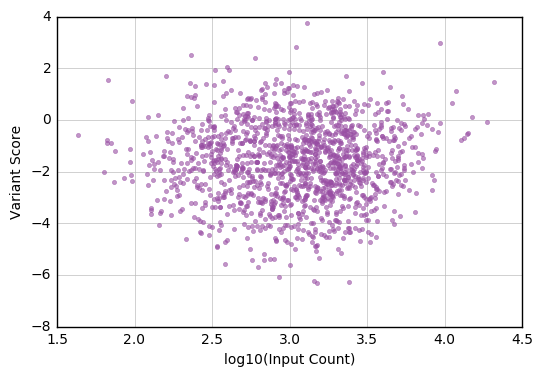

In [13]:
fig, ax = plt.subplots()
enrich_plot.configure_axes(ax, xgrid=True)
ax.plot(np.log10(variant_scores['input_count']), 
        variant_scores['score'], 
        linestyle='none', marker='.', alpha=0.6,
        color=enrich_plot.plot_colors['bright4'])
ax.set_xlabel("log10(Input Count)")
ax.set_ylabel("Variant Score")